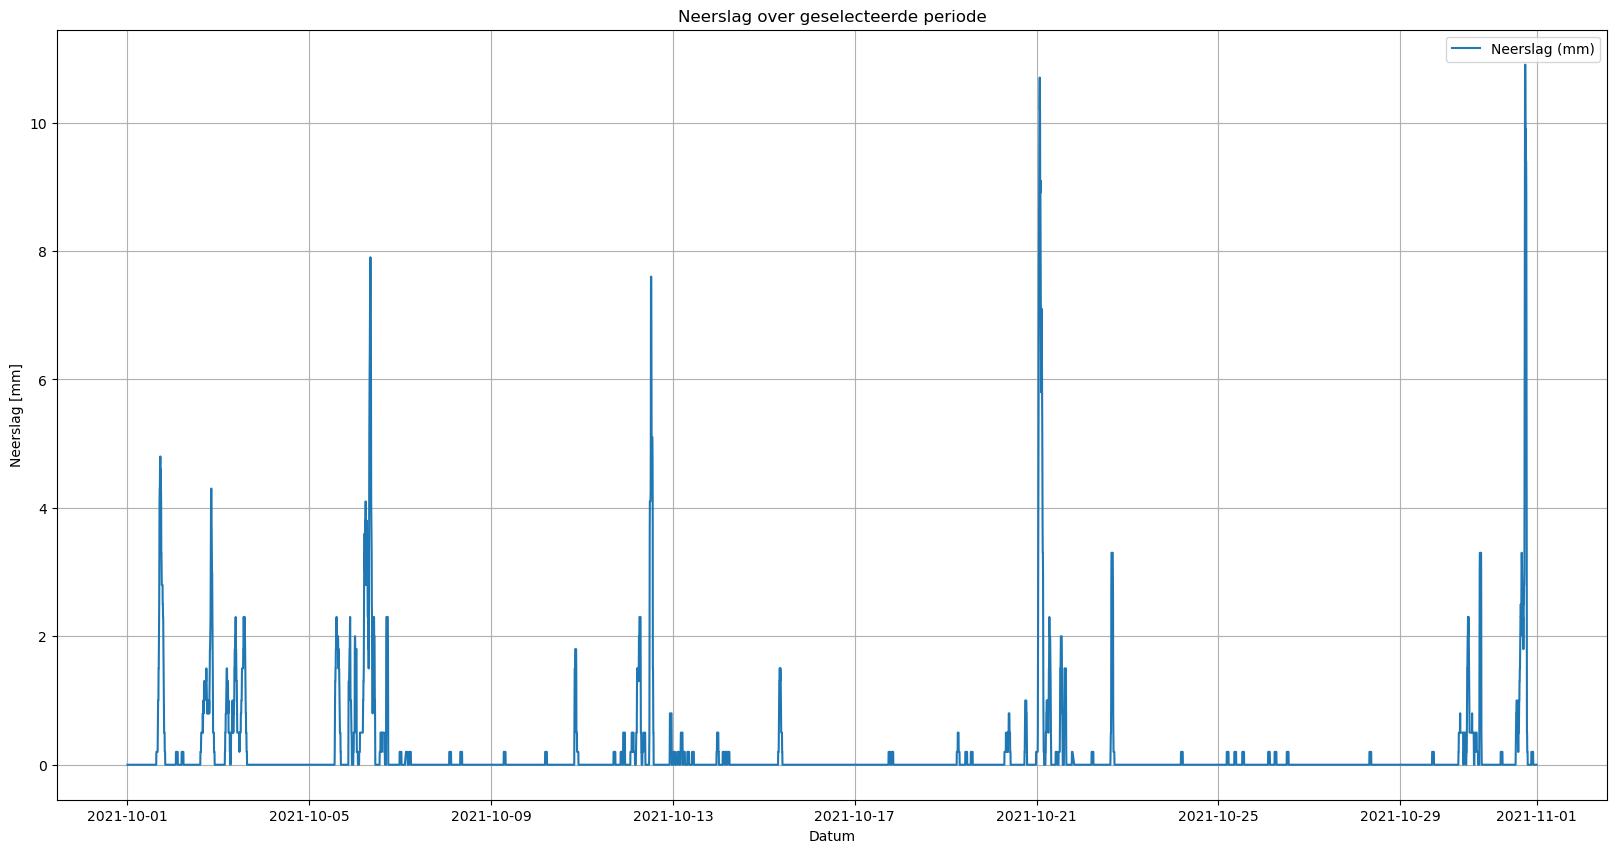

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Inladen neerslagdata
df_neerslag = pd.read_csv('Neerslag_Hoogmade.csv', skipinitialspace=True, header=0, sep=';')

# Maak een datum kolom
df_neerslag['DateTime'] = pd.to_datetime(df_neerslag['datum'])  # format is voor notatie van de import

# Zet 'neerslagintensiteit (mm/uur)' om naar numerieke waarden
df_neerslag['neerslagintensiteit (mm/uur)'] = pd.to_numeric(df_neerslag['neerslagintensiteit (mm/uur)'], errors='coerce')

# Vervang NaN door 0
df_neerslag['neerslagintensiteit (mm/uur)'].fillna(0, inplace=True)

# Instellen van de begin- en einddatum
begin_datum = '2021-10-01'
eind_datum = '2021-11-01'

# Filteren op de ingevoerde periode
gewenste_periode = (df_neerslag['DateTime'] >= begin_datum) & (df_neerslag['DateTime'] <= eind_datum)
df_neerslag_geselecteerd = df_neerslag.loc[gewenste_periode]

# Plot de DateTime tegenover de RH voor de geselecteerde periode
plt.figure(figsize=(20, 10))
plt.plot(df_neerslag_geselecteerd["DateTime"], df_neerslag_geselecteerd["neerslagintensiteit (mm/uur)"], label="Neerslag (mm)")
plt.title("Neerslag over geselecteerde periode")
plt.xlabel("Datum")
plt.ylabel("Neerslag [mm]")
plt.grid(True)
plt.legend()
plt.show()

# Omzetten neerslag naar mm, daarna naar m
df_neerslag['neerslagintensiteit (mm/uur)'] = df_neerslag['neerslagintensiteit (mm/uur)'] / 1000


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Inladen neerslagdata
df_neerslag = pd.read_csv('Neerslag_Hoogmade.csv', skipinitialspace=True, header=0, sep=';')

# Maak een datum kolom
df_neerslag['DateTime'] = pd.to_datetime(df_neerslag['datum'])  # format is voor notatie van de import

# Zet 'neerslagintensiteit (mm/uur)' om naar numerieke waarden
df_neerslag['neerslagintensiteit (mm/uur)'] = pd.to_numeric(df_neerslag['neerslagintensiteit (mm/uur)'], errors='coerce')

# Vervang NaN door 0
df_neerslag['neerslagintensiteit (mm/uur)'].fillna(0, inplace=True)

# Instellen van de begin- en einddatum
begin_datum = '2021-10-01'
eind_datum = '2021-11-01'

# Filteren op de ingevoerde periode
gewenste_periode = (df_neerslag['DateTime'] >= begin_datum) & (df_neerslag['DateTime'] <= eind_datum)
df_neerslag_geselecteerd = df_neerslag.loc[gewenste_periode]

# Plot de DateTime tegenover de RH voor de geselecteerde periode
plt.figure(figsize=(20, 10))
plt.plot(df_neerslag_geselecteerd["DateTime"], df_neerslag_geselecteerd["neerslagintensiteit (mm/uur)"], label="Neerslag (mm)")
plt.title("Neerslag over geselecteerde periode")
plt.xlabel("Datum")
plt.ylabel("Neerslag [mm]")
plt.grid(True)
plt.legend()
plt.show()

# Parameters
#Bergend Opp
A_hellend_dak = 660.88
A_vlak_dak = 56.12
A_rijweg_goot = 836.99
A_trottoir_goot = 532.36
A_parkeerplaatsen = 570.08
A_afstromend = A_hellend_dak + A_vlak_dak + A_rijweg_goot + A_trottoir_goot + A_parkeerplaatsen

#RW
A_RW = 1337.53   #Oppervlak van het bergend pakket (m^2)
k_RW = 200/24/12 #Doorlatendheidscoëfficiënt van de rockflow (m/5min)
p_RW = 0.95      #Porositeit Rockwool
#DZ
A_DZ = 0.70*180 
k_DZ = 10/24/12
p_DZ = 0.25
#KL
A_KL = 100
k_KL = 0.05/24/12   #Doorlatendheidscoëfficiënt van de bodem (m/5min)
p_KL = 0.4

#Overige
t0 = 0
Onderkant_wegcunet = -1.08  #In mNAP

#Arrays
dt = 1  # Tijdstap (5 minuten)
t = np.arange(0, tijdstappen, dt)  # Tijdstappen
V_RW = np.zeros(len(t))  # Array voor het volume water in de rockwool
H_RW = np.zeros(len(t))  # Array voor de waterhoogte in de rockwool
V_DZ = np.zeros(len(t))  # Array voor het volume water in het drainzand
H_DZ = np.zeros(len(t))  # Array voor de waterhoogte in het drainzand

# Initiële conditie
V_RW[0] = 0.0  # Initiële volume water in het rockwool(m^3)
V_DZ[0] = 0.0  # Initiële wolume water in het drainzand (m^3)

# Numerieke oplossing met behulp van de methode van Euler
for i in range(1, len(t)):
    Q_in_RW = neerslag_lijst[i]*A_afstromend
    Q_uit_RW = min(V_RW[i-1],A_DZ*k_DZ,#CAP bakje2))
    Q_in_DZ = min(V_RW[i-1],A_DZ*k_DZ,#CAP bakje2))
    Q_uit_DZ = 0

    dVdt = (neerslag_lijst[i] * A_afstromend - k_zand * A_zandpakket)
    V_RW[i] = (Q_in_RW-Q_uit_RW)*dt + V_RW[-1]
    H_RW[i] = V_RW/(p_RW*A_RW)+Onderkant_wegcunet
    V_DZ[i] = (Q_in_DZ-Q_uit_DZ)*dt + V_DZ[-1]
    H_DZ[i] = V_DZ/(p_DZ*A_DZ)



SyntaxError: '(' was never closed (3154208196.py, line 78)

C:\Users\tiesk\AppData\Local\Temp\ipykernel_13376\2140977056.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neerslag_geselecteerd['neerslagintensiteit (m/uur)'] = df_neerslag_geselecteerd['neerslagintensiteit (mm/uur)'] / 1000


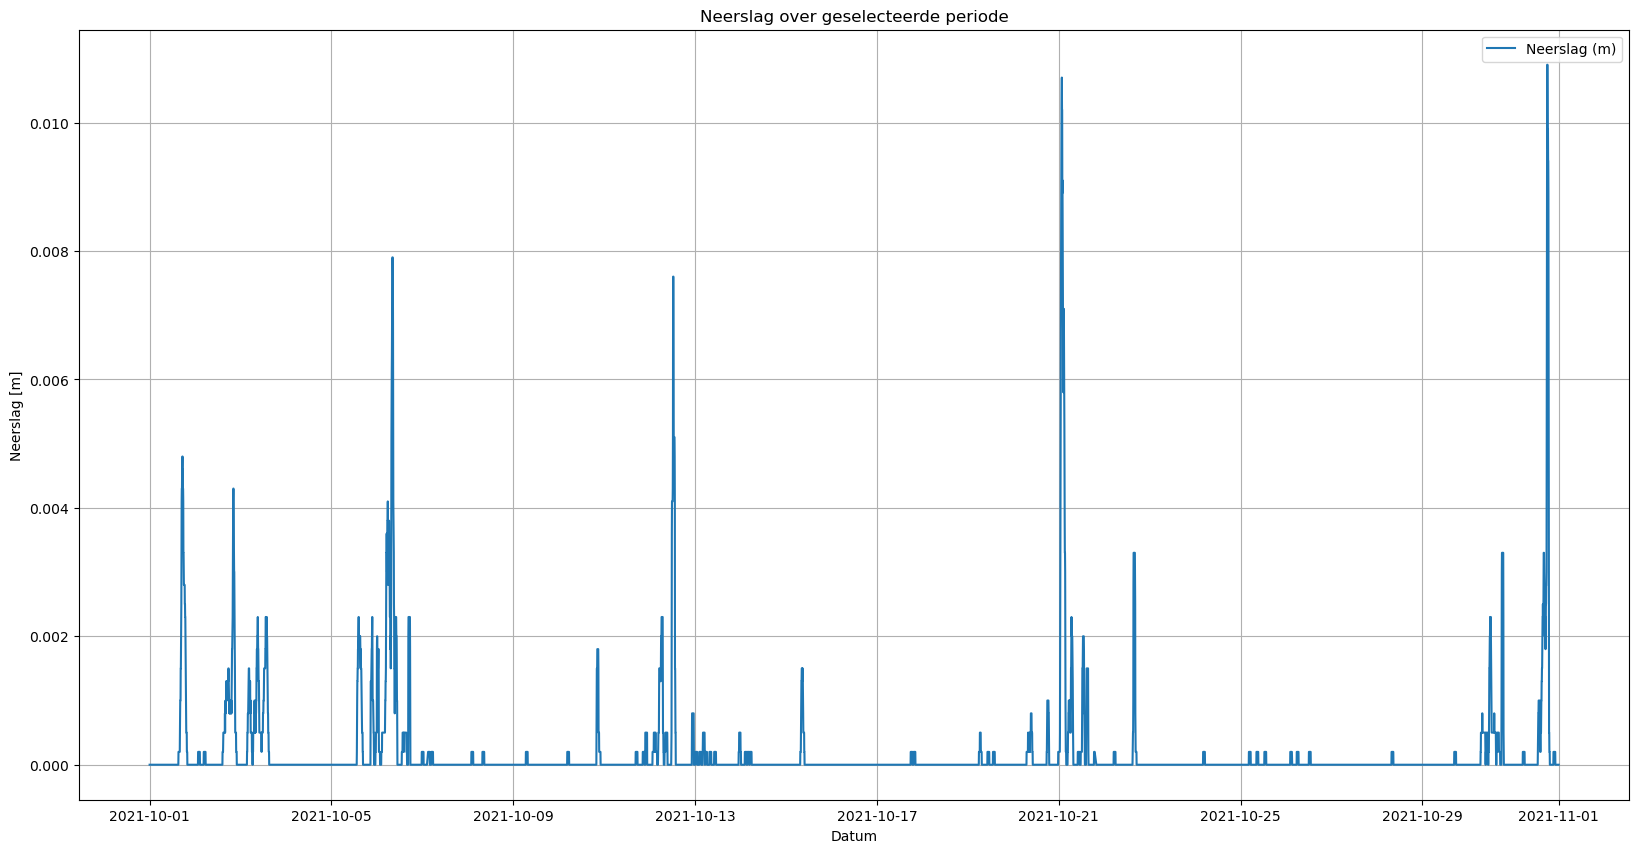

Gefilterde neerslagdata in meters:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Inladen neerslagdata
df_neerslag = pd.read_csv('Neerslag_Hoogmade.csv', skipinitialspace=True, header=0, sep=';')

# Maak een datum kolom
df_neerslag['DateTime'] = pd.to_datetime(df_neerslag['datum'])  # format is voor notatie van de import

# Zet 'neerslagintensiteit (mm/uur)' om naar numerieke waarden
df_neerslag['neerslagintensiteit (mm/uur)'] = pd.to_numeric(df_neerslag['neerslagintensiteit (mm/uur)'], errors='coerce')

# Vervang NaN door 0
df_neerslag['neerslagintensiteit (mm/uur)'].fillna(0, inplace=True)

# Instellen van de begin- en einddatum
begin_datum = '2021-10-01'
eind_datum = '2021-11-01'

# Filteren op de ingevoerde periode
gewenste_periode = (df_neerslag['DateTime'] >= begin_datum) & (df_neerslag['DateTime'] <= eind_datum)
df_neerslag_geselecteerd = df_neerslag.loc[gewenste_periode]

# Stap 1: Omzetten van neerslag van mm naar meter
df_neerslag_geselecteerd['neerslagintensiteit (m/uur)'] = df_neerslag_geselecteerd['neerslagintensiteit (mm/uur)'] / 1000

# Stap 2: Plaats de gefilterde data in een lijst
gefilterde_neerslag_data = df_neerslag_geselecteerd['neerslagintensiteit (m/uur)'].tolist()

# Stap 3: Plot de DateTime tegenover de neerslag in meters voor de geselecteerde periode
plt.figure(figsize=(20, 10))
plt.plot(df_neerslag_geselecteerd["DateTime"], df_neerslag_geselecteerd["neerslagintensiteit (m/uur)"], label="Neerslag (m)")
plt.title("Neerslag over geselecteerde periode")
plt.xlabel("Datum")
plt.ylabel("Neerslag [m]")
plt.grid(True)
plt.legend()
plt.show()

# Optioneel: Als je de gefilterde neerslagdata in meters in de console wilt bekijken
print("Gefilterde neerslagdata in meters:")
print(gefilterde_neerslag_data)


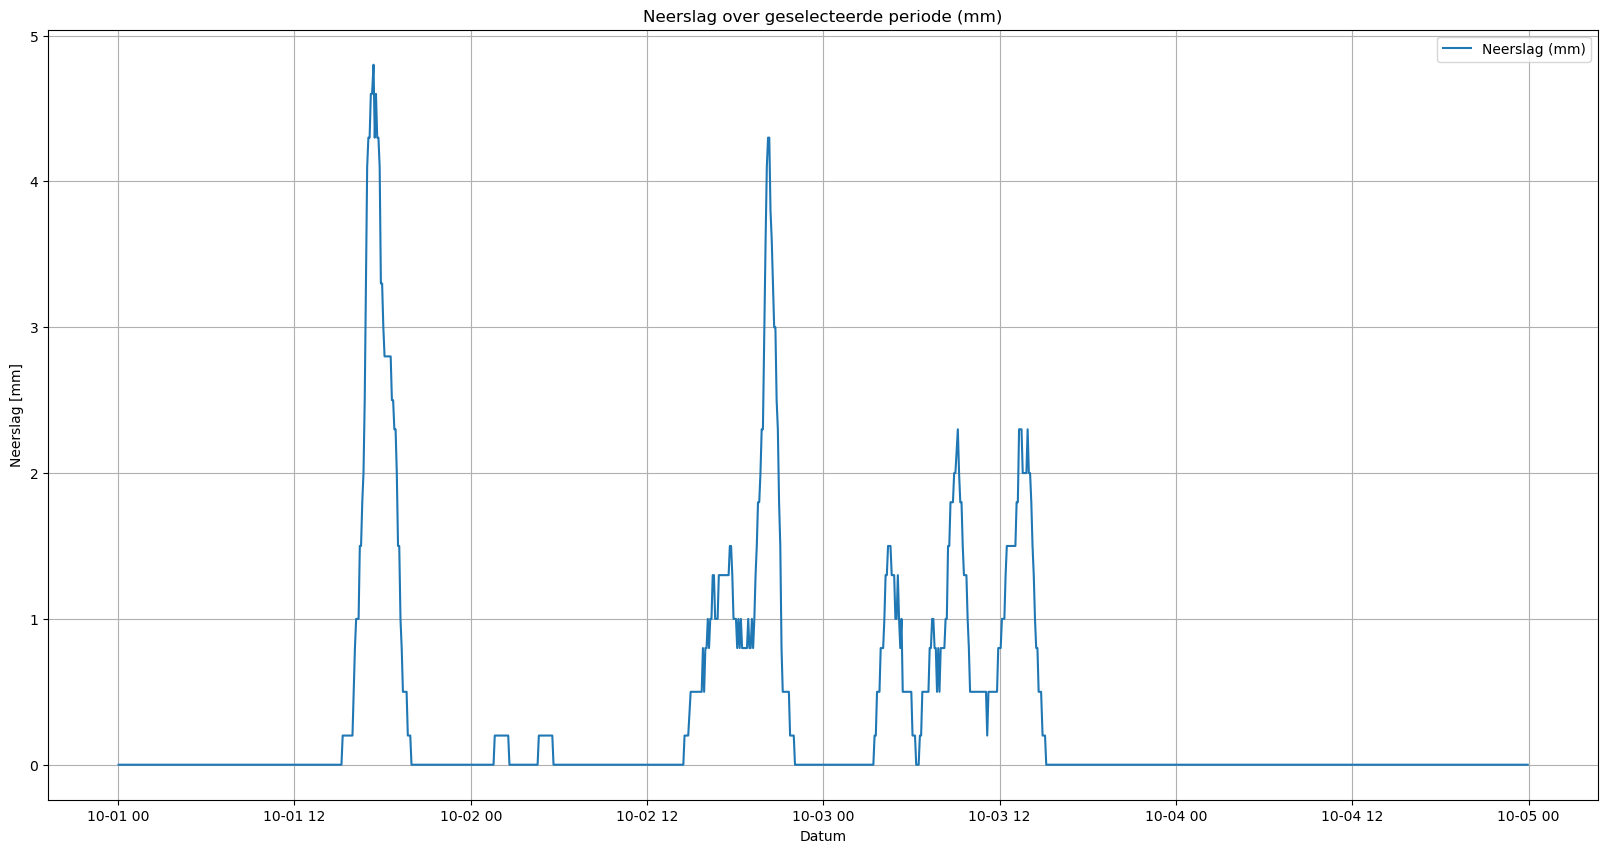

C:\Users\tiesk\AppData\Local\Temp\ipykernel_13376\2599204423.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neerslag_geselecteerd['neerslagintensiteit (m/uur)'] = df_neerslag_geselecteerd['neerslagintensiteit (mm/uur)'] / 1000


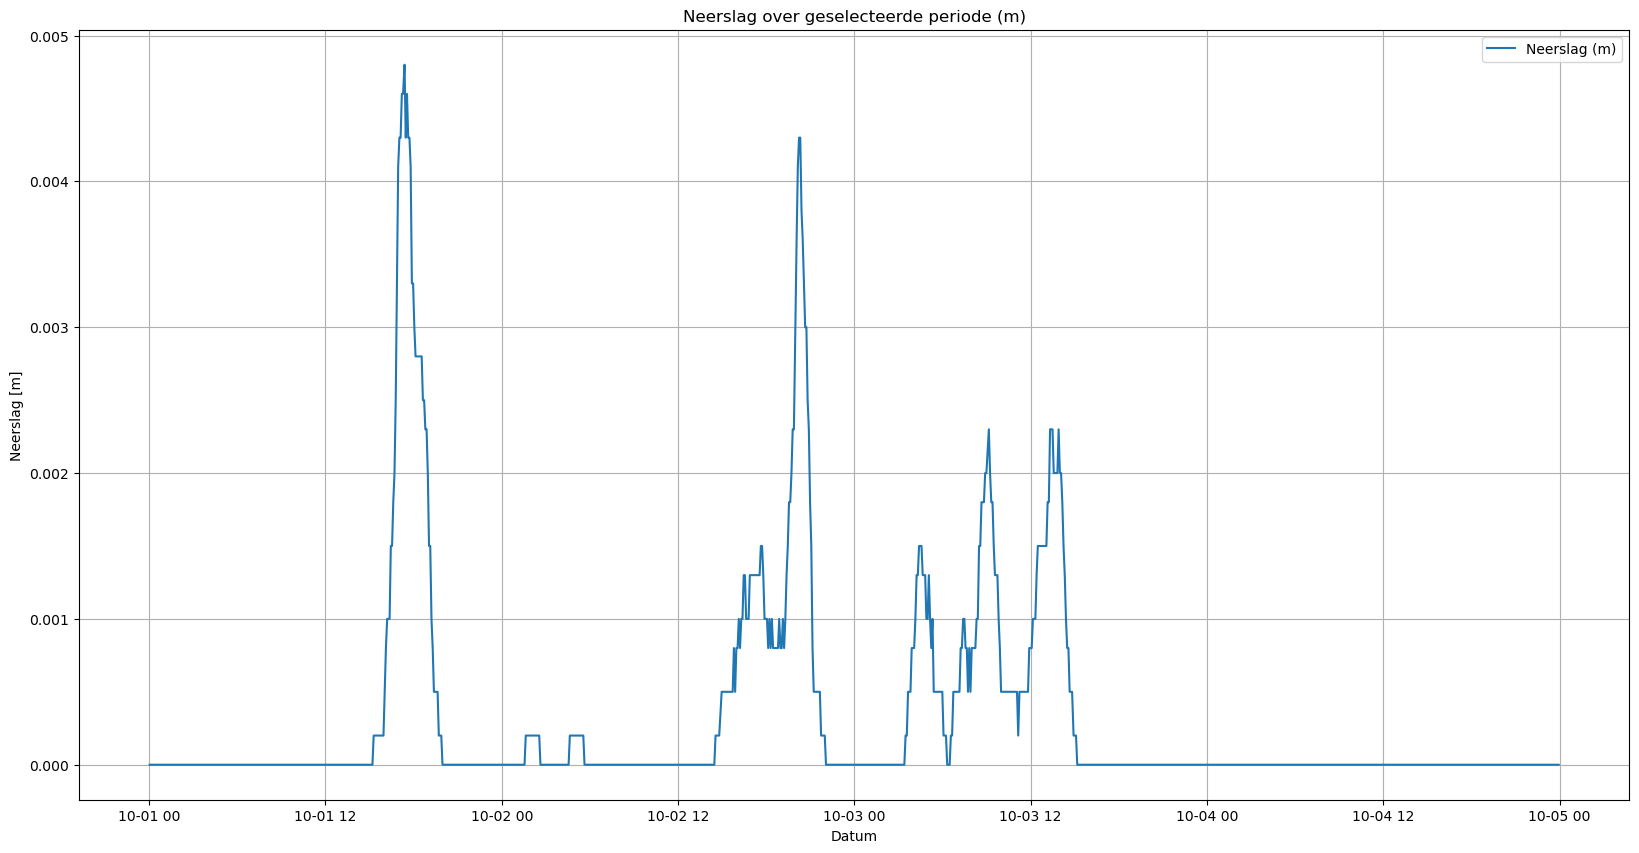

Gefilterde neerslagdata in meters:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Inladen neerslagdata
df_neerslag = pd.read_csv('Neerslag_Hoogmade.csv', skipinitialspace=True, header=0, sep=';')

# Maak een datum kolom
df_neerslag['DateTime'] = pd.to_datetime(df_neerslag['datum'])  # format is voor notatie van de import

# Zet 'neerslagintensiteit (mm/uur)' om naar numerieke waarden
df_neerslag['neerslagintensiteit (mm/uur)'] = pd.to_numeric(df_neerslag['neerslagintensiteit (mm/uur)'], errors='coerce')

# Vervang NaN door 0
df_neerslag['neerslagintensiteit (mm/uur)'].fillna(0, inplace=True)

# Instellen van de begin- en einddatum
begin_datum = '2021-10-01'
eind_datum = '2021-10-05'

# Filteren op de ingevoerde periode
gewenste_periode = (df_neerslag['DateTime'] >= begin_datum) & (df_neerslag['DateTime'] <= eind_datum)
df_neerslag_geselecteerd = df_neerslag.loc[gewenste_periode]

# Plot de DateTime tegenover de neerslag in millimeters voor de geselecteerde periode
plt.figure(figsize=(20, 10))
plt.plot(df_neerslag_geselecteerd["DateTime"], df_neerslag_geselecteerd["neerslagintensiteit (mm/uur)"], label="Neerslag (mm)")
plt.title("Neerslag over geselecteerde periode (mm)")
plt.xlabel("Datum")
plt.ylabel("Neerslag [mm]")
plt.grid(True)
plt.legend()
plt.show()

# Stap 1: Omzetten van neerslag van mm naar meter
df_neerslag_geselecteerd['neerslagintensiteit (m/uur)'] = df_neerslag_geselecteerd['neerslagintensiteit (mm/uur)'] / 1000

# Stap 2: Plaats de gefilterde data in een lijst
gefilterde_neerslag_data = df_neerslag_geselecteerd['neerslagintensiteit (m/uur)'].tolist()

# Plot de DateTime tegenover de neerslag in meters voor de geselecteerde periode
plt.figure(figsize=(20, 10))
plt.plot(df_neerslag_geselecteerd["DateTime"], df_neerslag_geselecteerd["neerslagintensiteit (m/uur)"], label="Neerslag (m)")
plt.title("Neerslag over geselecteerde periode (m)")
plt.xlabel("Datum")
plt.ylabel("Neerslag [m]")
plt.grid(True)
plt.legend()
plt.show()

# Optioneel: Als je de gefilterde neerslagdata in meters in de console wilt bekijken
print("Gefilterde neerslagdata in meters:")
print(gefilterde_neerslag_data)
